In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as dates

In [2]:
unemploy_data = pd.read_csv("data/ICNSA.csv")

In [3]:
unemploy_data.tail()

,DATE,ICNSA
2807,2020-10-24,738709
2808,2020-10-31,743904
2809,2020-11-07,725361
2810,2020-11-14,749338
2811,2020-11-21,827710


In [5]:
initial_claims = unemploy_data.rename(columns={'DATE':'Date', 'ICNSA':'Claims'})
initial_claims.tail()

,Date,Claims
2807,2020-10-24,738709
2808,2020-10-31,743904
2809,2020-11-07,725361
2810,2020-11-14,749338
2811,2020-11-21,827710


In [6]:
initial_claims['Year'] = pd.DatetimeIndex(initial_claims['Date']).year
initial_claims.tail()

,Date,Claims,Year
2807,2020-10-24,738709,2020
2808,2020-10-31,743904,2020
2809,2020-11-07,725361,2020
2810,2020-11-14,749338,2020
2811,2020-11-21,827710,2020


In [7]:
del initial_claims['Date']
initial_claims.tail()

,Claims,Year
2807,738709,2020
2808,743904,2020
2809,725361,2020
2810,749338,2020
2811,827710,2020


In [8]:
yearly_claims = initial_claims.groupby('Year').sum()
yearly_claims = yearly_claims.reset_index()
yearly_claims.tail()

,Year,Claims
49,2016,13986711
50,2017,12642045
51,2018,11486539
52,2019,11312985
53,2020,66728746


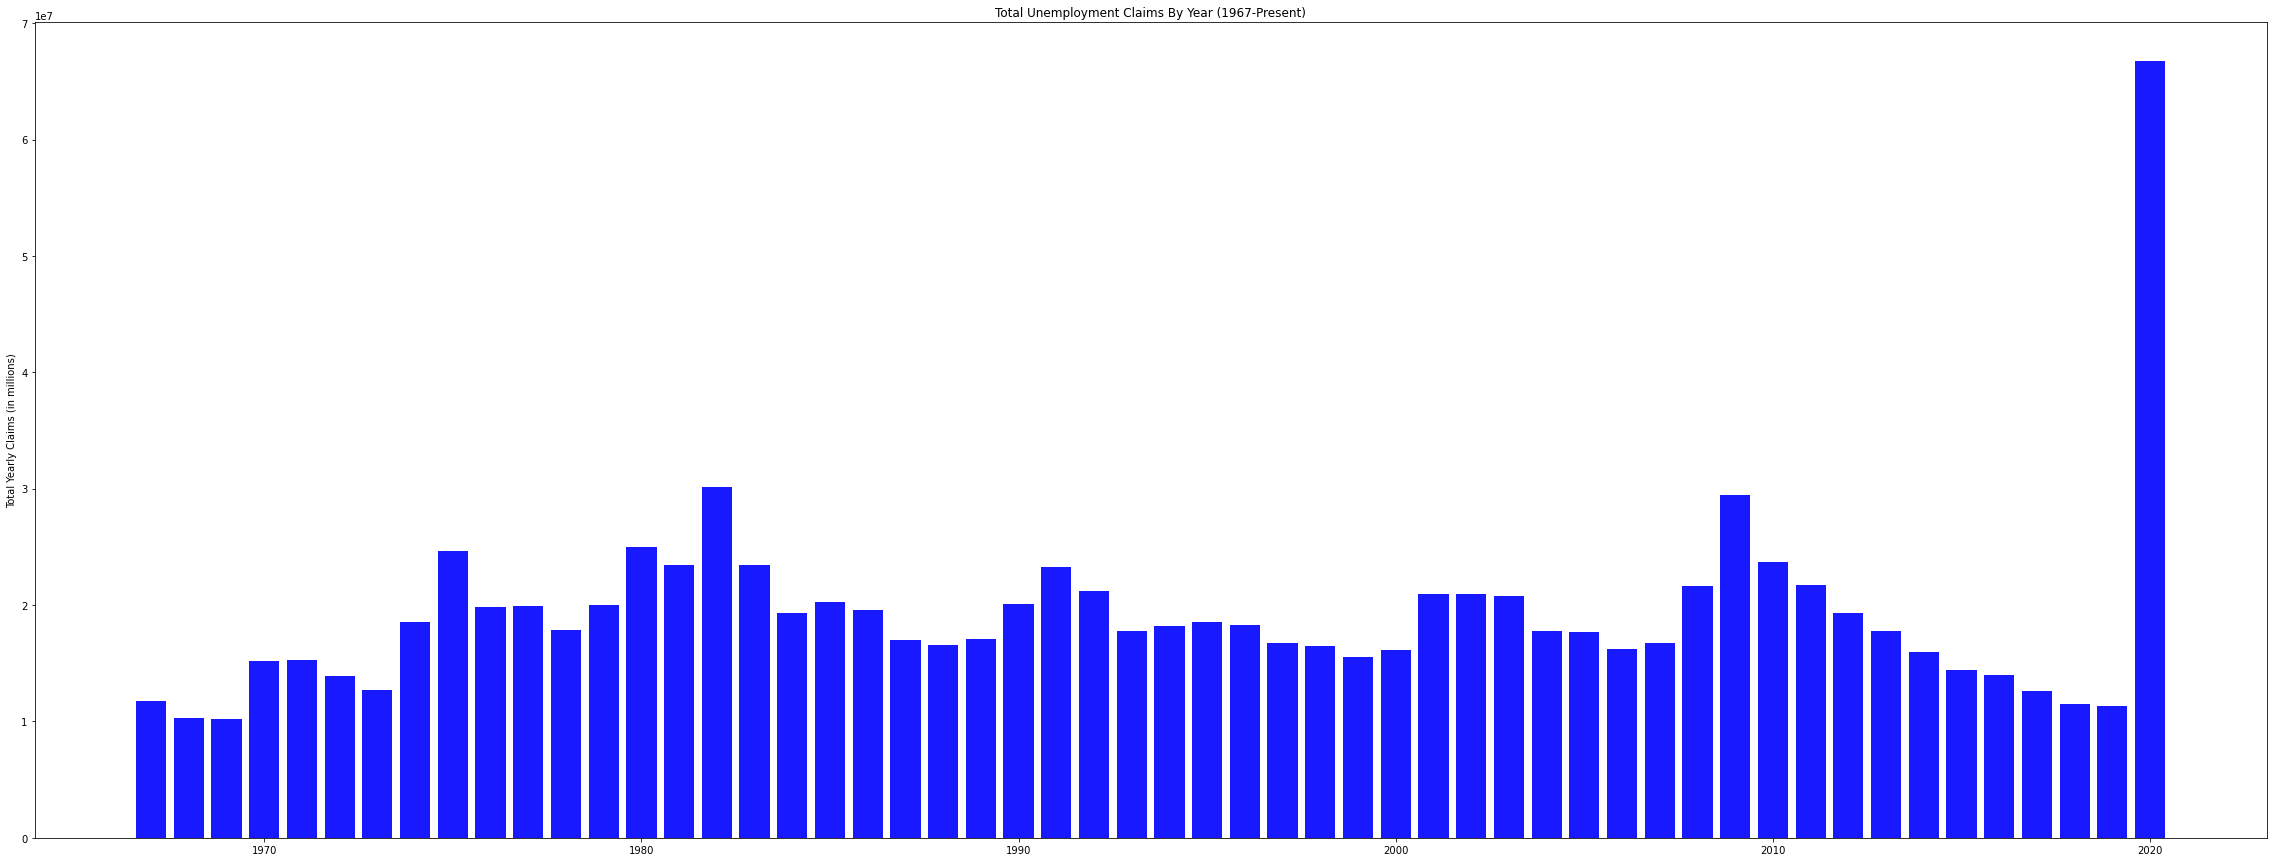

In [9]:
plt.figure(figsize=(40,15))
plt.bar(yearly_claims['Year'], yearly_claims['Claims'], color='blue', alpha=0.9)
plt.ylabel('Total Yearly Claims (in millions)')
plt.title('Total Unemployment Claims By Year (1967-Present)')
plt.savefig('output/yearly_claims.png')
plt.show()